# A Demo of this Project’s DataLoaders

This notebook loads a collection of galaxy images from the Galaxy Zoo: Hubble dataset.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from dataset.dataset import (
    device_checker,
    load_original_datasets,
    create_transforms,
    get_data_loaders,
    denormalize_tensor,
    denorm_mean_tensor,
    denorm_std_tensor
)

Importing packages in dataset.py...
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
Done importing in dataset.py.


In [2]:
# Initialize
device = device_checker()
dataset_dir = '../data/gz_hubble'  # UPDATE THIS
full_catalog = load_original_datasets(dataset_dir)

# Create dataloaders
single_view_transform, double_view_transform = create_transforms()
train_loader, _, _, train_dataset, _, _ = get_data_loaders(
    full_catalog,
    double_view_transform,
    num_workers=0,
    prefetch_factor=0,
    return_datasets=True
)


Using device: mps

Loading original datasets from file...


Saved the new combined catalog to: ../data/gz_hubble/full_catalog.parquet

{Train dataloader: size=70553}
{Validation dataloader: size=10079}
{Test dataloader: size=20158}
{Predict dataloader: None}


In [11]:
# Get a batch of training data
noisy1, _, _, _, _, _ = next(iter(train_loader))

# Print the shape of the images
print(noisy1[0].shape)

torch.Size([3, 224, 224])


# Plot the first batch of images

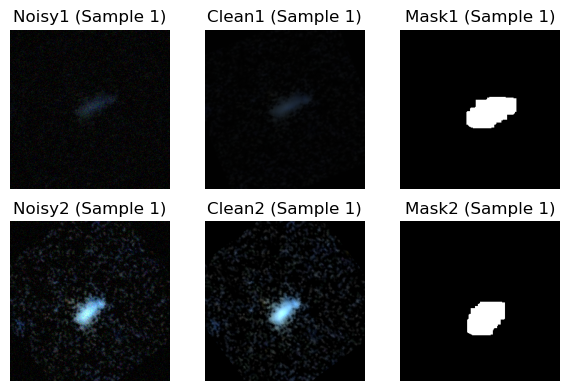

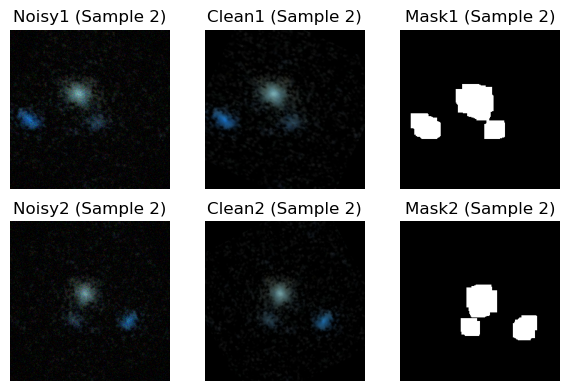

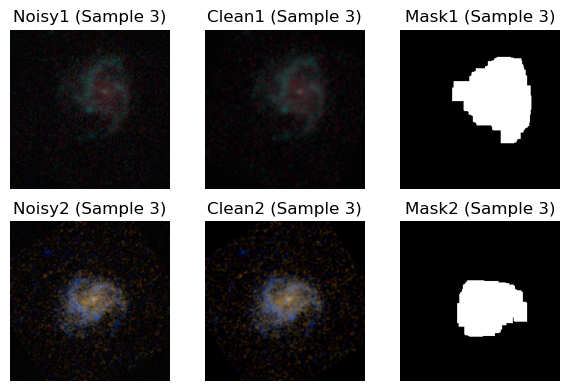

In [9]:
# Helper function
def tensor_to_np(tensor_img):
    np_img = tensor_img.cpu().permute(1, 2, 0).numpy()
    return np.clip(np_img, 0, 1)


# Number of examples to view
num_examples = 3

for i in range(num_examples):
    # Get sample from dataset
    sample = train_dataset[i]
    noisy1, noisy2, clean1, clean2, mask1, mask2 = sample

    # Denormalize each image
    denorm_noisy1 = denormalize_tensor(noisy1, denorm_mean_tensor, denorm_std_tensor)
    denorm_noisy2 = denormalize_tensor(noisy2, denorm_mean_tensor, denorm_std_tensor)
    denorm_clean1 = denormalize_tensor(clean1, denorm_mean_tensor, denorm_std_tensor)
    denorm_clean2 = denormalize_tensor(clean2, denorm_mean_tensor, denorm_std_tensor)

    # Convert tensors to NumPy
    np_noisy1 = tensor_to_np(denorm_noisy1)
    np_noisy2 = tensor_to_np(denorm_noisy2)
    np_clean1 = tensor_to_np(denorm_clean1)
    np_clean2 = tensor_to_np(denorm_clean2)

    # Temporarily invert masks such that 1=foreground/galaxy, 0=background
    mask1_inv = 1 - mask1
    mask2_inv = 1 - mask2

    # Plot the images in a 2×3 grid
    fig, axes = plt.subplots(2, 3, figsize=(6, 4))

    # Row 1
    axes[0, 0].imshow(np_noisy1)
    axes[0, 0].set_title(f"Noisy1 (Sample {i + 1})")
    axes[0, 0].axis("off")
    axes[0, 1].imshow(np_clean1)
    axes[0, 1].set_title(f"Clean1 (Sample {i + 1})")
    axes[0, 1].axis("off")
    axes[0, 2].imshow(mask1_inv, cmap='gray')
    axes[0, 2].set_title(f"Mask1 (Sample {i + 1})")
    axes[0, 2].axis("off")

    # Row 2
    axes[1, 0].imshow(np_noisy2)
    axes[1, 0].set_title(f"Noisy2 (Sample {i + 1})")
    axes[1, 0].axis("off")
    axes[1, 1].imshow(np_clean2)
    axes[1, 1].set_title(f"Clean2 (Sample {i + 1})")
    axes[1, 1].axis("off")
    axes[1, 2].imshow(mask2_inv, cmap='gray')
    axes[1, 2].set_title(f"Mask2 (Sample {i + 1})")
    axes[1, 2].axis("off")

    plt.tight_layout()
    plt.show()